## Waste management using CNN model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path = "TRAIN"
test_path = "TEST"

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils import plot_model
from glob import glob

In [4]:
x_data = []
y_data = []

for category in glob(train_path + "/*"):
    for file in tqdm(glob(category + "/*")):
        img_arr = cv.imread(file)
        img_arr = cv.cvtColor(img_arr, cv.COLOR_BGR2RGB)
        x_data.append(img_arr)
        y_data.append(category.split("/")[-1])

data = pd.DataFrame({'image': x_data, "label": y_data})

100%|██████████| 9999/9999 [01:33<00:00, 106.62it/s]


In [5]:
data.shape

(22564, 2)

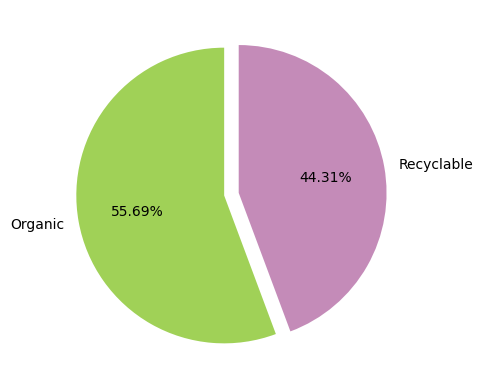

In [6]:
colors = ["#a0d157","#c48bb8"]

plt.pie(data.label.value_counts(), labels=["Organic", "Recyclable"], autopct="%0.2f%%", colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()

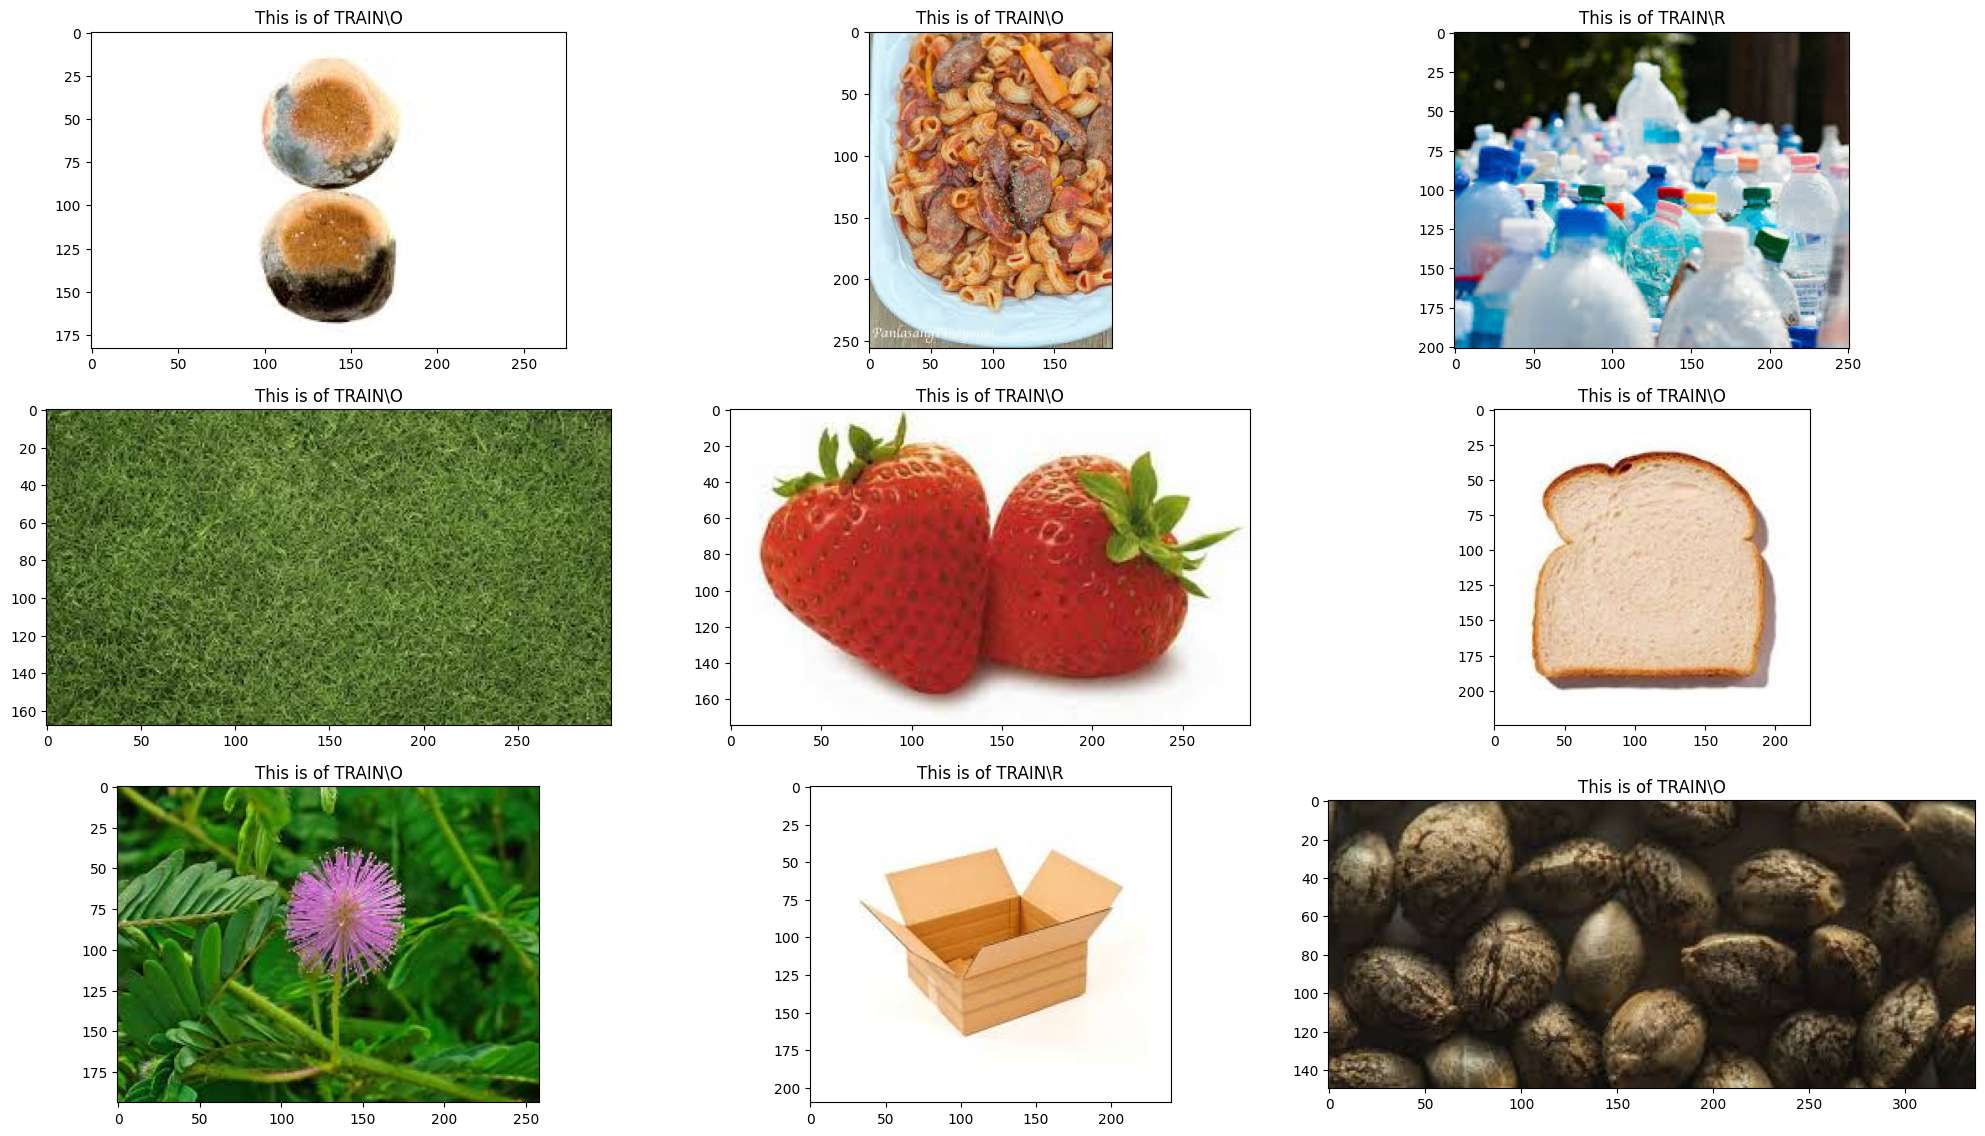

In [7]:
plt.figure(figsize= (20,15))

for i in range(9):
    plt.subplot(4,3, (i%12) +1)
    index  = np.random.randint(15000)
    plt.title(f"This is of {data.label[index]}")
    plt.imshow(data.image[index])
    plt.tight_layout()

CNN - Convolutional Neural Network


In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer= "Adam", metrics= ["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [10]:
train_data_generator = ImageDataGenerator(rescale= 1./255)

In [11]:
test_data_generator = ImageDataGenerator(rescale= 1./255)

In [12]:
train_generator = train_data_generator.flow_from_directory(
    train_path, target_size = (224,224), batch_size= 256, color_mode = "rgb", class_mode = "categorical" 
)

Found 22564 images belonging to 2 classes.


In [13]:
test_generator = test_data_generator.flow_from_directory(
    test_path, target_size = (224,224), batch_size= 256, color_mode = "rgb", class_mode = "categorical" 
)

Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator, epochs = 10, validation_data = test_generator
)